# Examples of Optimization using Scipy

In [ ]:
# We demonstrate three examples for optimization using scipy.
# The first example is to find out the minimium of a function 
# with single variable. The second example is a problem of linear
# programming with two variables with constraints and bounds.
# The third example is to optimize a portforlio through maximing 
# the Sharpe ratio.
#
# Reference:
# [1] https://www.scipy-lectures.org/advanced/mathematical_optimization/
# [2] Yves Hilpisch, "Python for Finance", O'Reilly (2015).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

# Example 1: Finding the minimum of a single-variable function

In [2]:
f = lambda x: x*(x+2)*(x-5)*(x+8)+.5*x**2

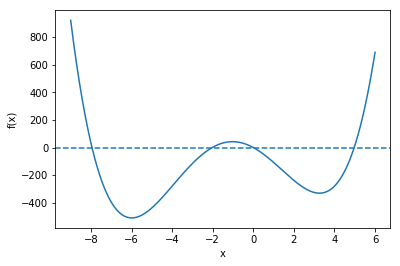

In [39]:
x = np.linspace(-9,6,num=2000)
plt.plot(x,f(x))
plt.axhline(y=0,linestyle='dashed')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

In [4]:
from scipy.optimize import minimize_scalar

In [5]:
result1 = minimize_scalar(f,bounds=(-10, 5),method='bounded',tol=1e-6)

C:\Users\HoT\Anaconda3_2\lib\site-packages\scipy\optimize\_minimize.py:600: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  "defaulting to absolute tolerance.", RuntimeWarning)


In [6]:
result1.success

True

In [7]:
min_x = result1.x
print("The minimum of function is {}".format(round(f(min_x),3))+" at {}".format(round(min_x,3))+'.')

The minimum of function is -510.011 at -5.989.


# Example 2: Linear Programming problem

In [8]:
# Minimize Z = .4*x1 + .5*x2
c = [.4, .5]

In [9]:
# Constraint:
#   .3*x1 + .1*x2 <= 2.7 ;
#   .5*x1 + .5*x2 = 6 ;
#   .6*x1 + .4*x2 >= 6.
#
#   Inequality:   A*x <= b
A0 = [[.3,.1],[-.6,-.4]]
b0 = [2.7, -6]
#  Equality: A*x = b
A1 = [[.5, 0.5]]
b1 = [6]
#
# Bounds on variables:
# x1 >= 0, x2 >= 0
bnds = ((0,None), (0,None))

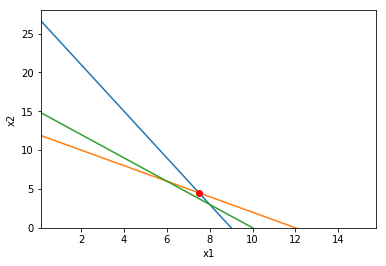

In [41]:
# Optimal solution is (x1=7.5,x2=4.5) and Z = 5.25.
x1 = np.linspace(0,15,num=1000)
plt.plot(x1,(2.7-.3*x1)/.1)
plt.plot(x1,(6-.5*x1)/.5)
plt.plot(x1,(6-.6*x1)/.4)
plt.ylim(0,28)
plt.xlim(0.12)
plt.plot(7.5,4.5,'ro')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [11]:
from scipy.optimize import linprog

In [12]:
result2 = linprog(c, A_ub = A0, b_ub = b0, A_eq = A1, b_eq = b1,  bounds = bnds)

In [13]:
# The result is same as the optimal solution.
result2

     fun: 5.25
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([0. , 0.3])
  status: 0
 success: True
       x: array([7.5, 4.5])

# Example 3: Portfolio Optimization

In [ ]:
# We minimize the portfolio with five stocks (FANG: Facebook, Apple, Amazon, Netflix and Google).

In [14]:
import pandas_datareader.data as web

In [15]:
tickers = ['FB','AAPL','AMZN','NFLX','GOOG']

In [20]:
df = pd.DataFrame()
for i in tickers:
    df[i] = web.DataReader(i,data_source='yahoo',start='1/1/2006')['Adj Close']

In [21]:
df.head()

,FB,AAPL,AMZN,NFLX,GOOG
Date,,,,,
2012-05-18,38.230000,51.095005,213.850006,9.994286,298.260101
2012-05-21,34.029999,54.071804,218.110001,10.248571,305.070801
2012-05-22,31.000000,53.656597,215.330002,9.672857,298.458801
2012-05-23,32.000000,54.965813,217.279999,10.272857,302.760834
2012-05-24,33.029999,54.461002,215.240005,10.038571,299.879578


In [22]:
# Return of stock
returns = np.log(df/df.shift(1))

In [23]:
returns.mean()*252

FB      0.247955
AAPL    0.226478
AMZN    0.345754
NFLX    0.570465
GOOG    0.227748
dtype: float64

In [24]:
nstock = len(df.columns)

In [27]:
# To minimize the negative Sharpe Ratio
# assume risk-free rate
def Sharpe_ratio(weight):
    preturns = np.sum(returns.mean()*weight)*252
    pvol = np.sqrt(np.dot(weight.T,np.dot(returns.cov()*252,weight)))
    return -preturns/pvol

In [28]:
cons = ({'type':'eq','fun':lambda x: np.sum(x)-1})
bnds = tuple((0,1) for x in range(nstock))

In [29]:
from scipy.optimize import minimize

In [30]:
%time opt_weight = minimize(Sharpe_ratio,x0=np.ones(nstock)/nstock, method='SLSQP',bounds=bnds,constraints=cons,tol=1e-6)

Wall time: 39.9 ms


In [31]:
opt_weight

     fun: -1.5630785604213178
     jac: array([-2.62379646e-04,  1.18613243e-05,  1.95205212e-06,  8.79168510e-06,
        1.80304050e-05])
 message: 'Optimization terminated successfully.'
    nfev: 49
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.0311934 , 0.30119949, 0.32848469, 0.23059723, 0.10852519])

In [32]:
# Weight of optimal portfolio
oweight = opt_weight['x']

In [33]:
# Sharpe ratio
print("Sharpe Ratio is",round(-Sharpe_ratio(oweight),4))

Sharpe Ratio is 1.5631


In [46]:
# Return and volatility with optimal weight
preturns = np.sum(returns.mean()*oweight)*252
pvol = np.sqrt(np.dot(oweight.T,np.dot(returns.cov()*252,oweight)))
print("Optimal return is {}".format(round(preturns,3))+".")
print("Optimal volatility is {}".format(round(pvol,3))+".")

Optimal return is 0.346.
Optimal volatility is 0.221.


In [25]:
# Generate the different returns and volatilities with different weights
ntrials = 50000
portf_returns = np.zeros(ntrials)
portf_rvolatity = np.zeros(ntrials)
for i in range(ntrials):
    weight = np.random.random(nstock)
    weight = weight/np.sum(weight)
    portf_returns[i] = np.sum(returns.mean()*weight)*252
    portf_rvolatity[i] = np.sqrt(np.dot(weight.T,np.dot(returns.cov()*252,weight)))

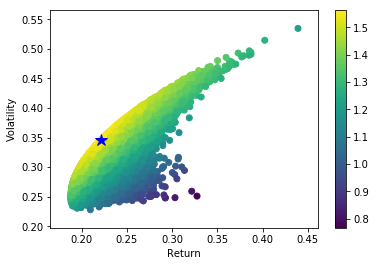

In [47]:
plt.scatter(portf_rvolatity,portf_returns,c=portf_returns/portf_rvolatity)
plt.plot(pvol,preturns,'b*',markersize=12)
plt.xlabel('Return')
plt.ylabel('Volatility')
plt.colorbar()
plt.show()